## The Relationship Between Schooling Level and Life Expectancy  Around the World
#### An exploratory model using linear regression 

### Nicolas Díaz Durana<br/>
614182002

Linear regression is a statistical method of analysis used to study and model the relationship between to variables: a dependant and a series of independant variables. It is one of the most studied and oldest methods of linear analysis, and has multiple practical applications [4].

We begin by importing the libraries we will be using in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io
from google.colab import files

## The Data-set
The data-set used for the analysis relates several factors to life expectancy. It is made up mostly by health factors from 193 countries, collected from the World Health Organization (WHO) data repository website, and economic data   collected from United Nation website. The entire data-set can be accessed in kaggle.com [1] <br/>


Firstly, we import the data-set and explore its main features:

In [2]:
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data (2).csv


In [3]:
raw_data = pd.read_csv('Life Expectancy Data.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
raw_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### The Linear Regression Model

The data consists of $2938$ entries distributed along $22$ columns.<br/>

Looking at the general data, we observe that life expectancy can be put in terms of other variables. In other words, it will be the dependant variable which we aim to predict based on the behavior of the rest of independant variables. <br/>
To this end we divide the data into two arrays:
* Independant variables in the x-axis
* One dependant variable y the y-axis

In [22]:
raw_data = raw_data.fillna(raw_data.mean()) #solves the NaN problem

In [23]:
x = raw_data[['Adult Mortality','infant deaths','under-five deaths ','Schooling','Population']]

In [24]:
y = raw_data['Life expectancy ']

For this model, we decide to work with only five independant variables:
* Adult mortality
* Infant deaths
* Under-five deaths
* Schooling
* Population<br/>

We want to see whether one of these variables is more strongly related to life expectancy.


### Building and Training the Model

We used the LinearRegression estimator from scikit-learn. [2]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [27]:
#building the training model
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

The fit() method can be used to train this model on our training data. Next, we are interested in the coefficients of the model as an indicator of how the dependant variable is interacting with the independant variables.

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
print(model.coef_) #coefficients

[-3.41787016e-02  1.33728983e-01 -1.03718362e-01  1.37977510e+00
  3.81901916e-09]


In [31]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coefficients'])


,Coefficients
Adult Mortality,-3.417870e-02
infant deaths,1.337290e-01
under-five deaths,-1.037184e-01
Schooling,1.379775e+00
Population,3.819019e-09


Here, we can focus on the Schooling variable specifically, which has a coefficient of approximately $1.4$. What this means is that we hold all other variables constant, then a one-unit increase in Schooling will result in a $1.4$-unit increase in the predicted variable, in this case, Life Expectancy.

In other words, larger coefficients on a specific variable mean that a variable has a large impact on the value of the variable we are trying to predict. Similarly, small values have small impact.

Now, we want to compare the values of the predictions array with the values of y_test.

In [ ]:
predictions = model.predict(x_test)

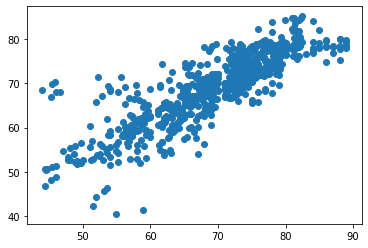

In [ ]:
plt.scatter(y_test, predictions)

As observed, the predicted values are close to the actual values for the observations in the data set. A straight diagonal line would indicate that the model perfectly predicts the y-array values.<br/>


### Conclusion and recommendations

We want to know how the schooling level actually influences the life expectancy of an individual. For this, we plot the data of these to variables and apply a simple linear regression model from Numpy.

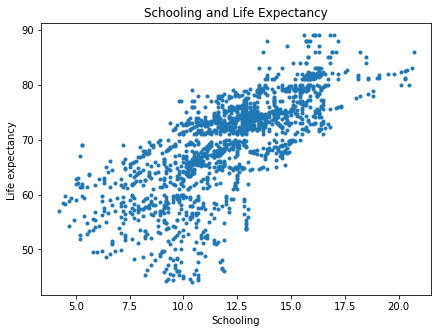

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(raw_data['Schooling'], raw_data['Life expectancy '],'.')
plt.title('Schooling and Life Expectancy',)
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.show()

In [ ]:
c = np.polyfit(raw_data['Schooling'], raw_data['Life expectancy '], 1)

In [ ]:
p = np.polyval(c, raw_data['Schooling'])

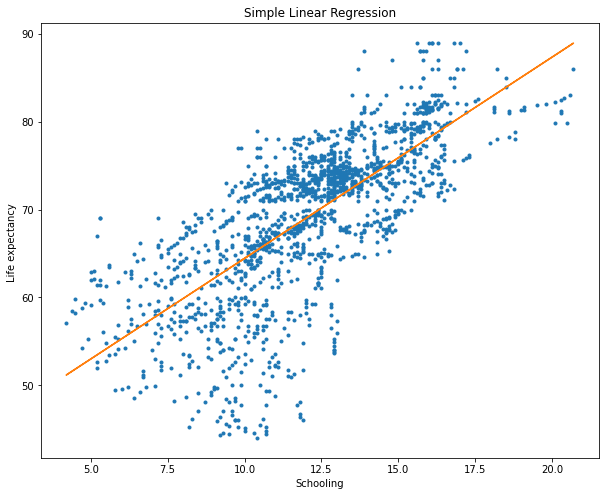

In [ ]:
plt.figure(figsize = (10,8))
plt.title('Simple Linear Regression')
plt.plot(raw_data['Schooling'], raw_data['Life expectancy '],'.')
plt.plot(raw_data['Schooling'], p)
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.show()

Although the data is somehow scattered, there seems to be a positive correlation between the schooling level and life expectancy. Further studies exploring the data should be implemented to confirm this hypothesis. Equally important, a deeper analysis of the demographic and contextual elements should be taken in account before reaching any final conclusions.

### References

1. Life Expectancy (WHO). Taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who in November 2021. 
2. Scikit-learn Linear Regression. Taken from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html in November 2021
3.  Stojiljković, Mirko. Linear Regression in Python. https://realpython.com/linear-regression-in-python/ in November 2021
4. Yan, X., & Su, X. (2009). Linear regression analysis: theory and computing. World Scientific.

